In [ ]:
import numpy as np
import pylab as pl
import scipy as sp

In [ ]:
from google.colab import files

# Upload the file
uploaded = files.upload()

Saving ECoG.npz to ECoG.npz


#Data visualization and pre-processing

1. *Load the dataset in memory and plot the EcoG signals and the finger movement on the same figure (np.load,pl.plot,pl.subplot).*

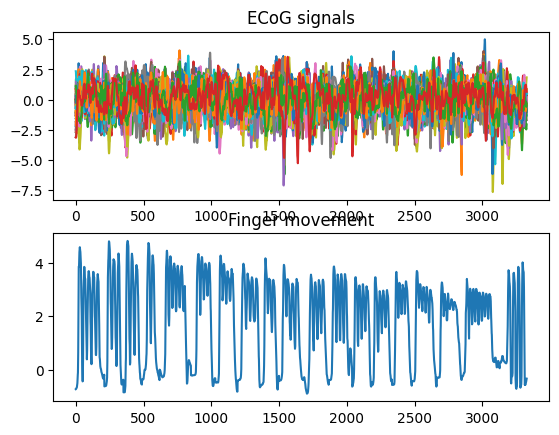

In [ ]:
# Load the dataset
data = np.load('ECoG.npz')

Xall = data['Xall']
Yall = data['Yall']
Fe = data['Fe']

# Create a new figure
pl.figure()

# Create a subplot for ECoG signals
pl.subplot(2, 1, 1)
for i in range(Xall.shape[1]):
    pl.plot(Xall[:, i])
pl.title('ECoG signals')

# Create a subplot for finger movement
pl.subplot(2, 1, 2)
pl.plot(Yall)
pl.title('Finger movement')

# Display the plot
pl.show()

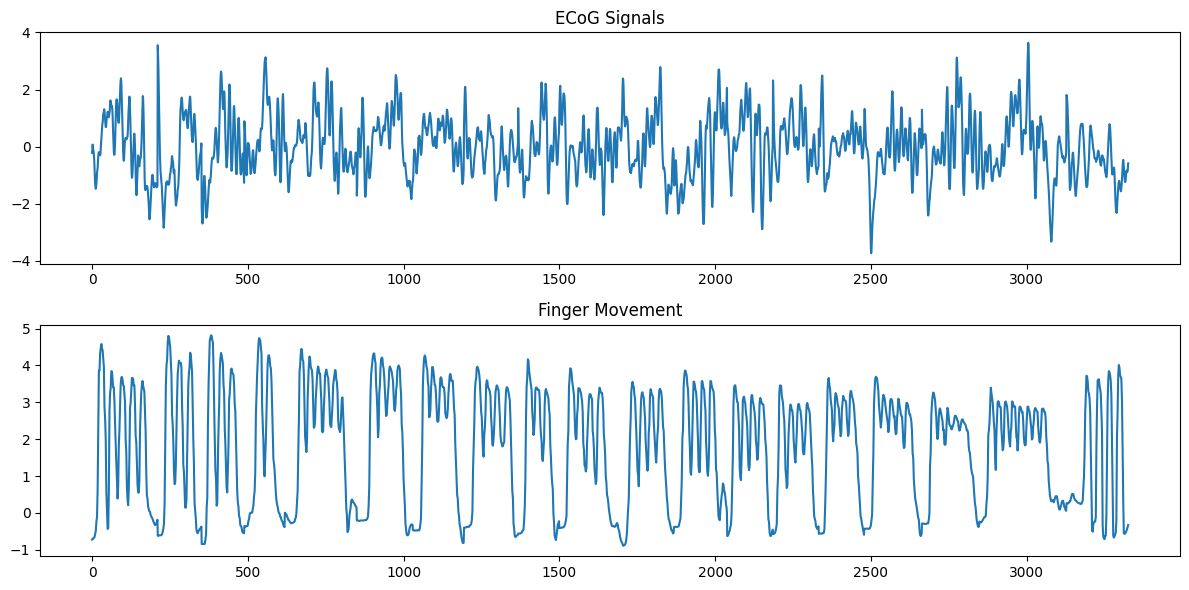

In [ ]:
pl.figure(figsize=(12, 6))
pl.subplot(2, 1, 1)
pl.plot(Xall[:, 45], label='ECoG Signal (Variable 45)')
pl.title('ECoG Signals')
pl.subplot(2, 1, 2)
pl.plot(Yall, label='Finger Movement')
pl.title('Finger Movement')
pl.tight_layout()
pl.show()

2. *Visualize the data as a scatter plot wherre the color of the samples is the value to predict y and their position are variables 45 and 48 of Xall (pl.scatter with Yall controlling the color).*

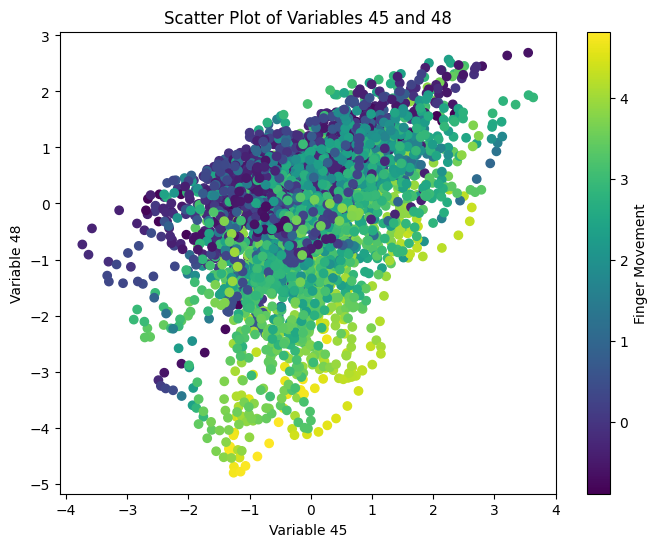

In [ ]:
# Visualize the data as a scatter plot
pl.figure(figsize=(8, 6))
pl.scatter(Xall[:, 45], Xall[:, 48], c=Yall, cmap='viridis')
pl.xlabel('Variable 45')
pl.ylabel('Variable 48')
pl.colorbar(label='Finger Movement')
pl.title('Scatter Plot of Variables 45 and 48')
pl.show()

*Comment:* We can observe a degradation of color, which reflects how the dataset values are distributed among the variables 45 and 48.

3. *Split the data in a training and a testing set with n = 1000 training samples and the remaining samples
as testing samples (x=Xall[:n,:] to select the n first lines in a matrix).*

In [ ]:
# Define the number of training samples
n = 1000

# Split the data into training and testing sets
X_train = Xall[:n, :]
Y_train = Yall[:n, :]
X_test = Xall[n:, :]
Y_test = Yall[n:, :]

#Least Squares regression (LS)

1. *Create the training matrix $\˜X$ as defined in the course by concatenating a columns of 1s to the training
samples (np.concatenate,np.ones).*

In [ ]:
# Assuming X_train is your training samples
n_samples = X_train.shape[0]

# Create a column vector of ones with the same number of rows as X_train
ones = np.ones((n_samples, 1))

# Concatenate the column of ones to X_train
X_tilde = np.concatenate((ones, X_train), axis=1)

2. *Estimate the LS parameters on the training data by solving the linear problem. Store those parameters
as a vector w and a bias b (np.dot,np.linalg.solve).*

In [ ]:
# Estimate the LS parameters
parameters = np.linalg.solve(np.dot(X_tilde.T, X_tilde), np.dot(X_tilde.T, Y_train))

# The first parameter is the bias (b)
b = parameters[0]

# The remaining parameters form the vector (w)
w = parameters[1:]

3. *Predict the finger flexion of the subject on the training and test sets. Plot the predictions along with
the true y (pl.plot). Is the prediction good on test data?*

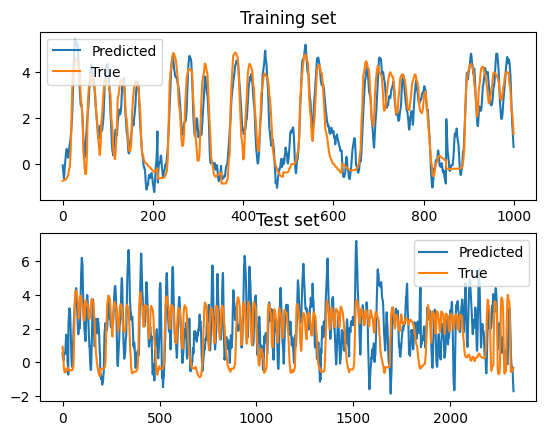

In [ ]:
# Assuming X_train, X_test, Y_train, Y_test are your training/testing data/labels,
# and b and w are your estimated bias and weight vector

# Add a column of ones to X_test
n_test_samples = X_test.shape[0]
ones_test = np.ones((n_test_samples, 1))
X_test_tilde = np.concatenate((ones_test, X_test), axis=1)

# Predict finger flexion on the training set
Y_train_pred = np.dot(X_tilde, parameters)

# Predict finger flexion on the test set
Y_test_pred = np.dot(X_test_tilde, parameters)

# Create a new figure
pl.figure()

# Plot predictions and true y for the training set
pl.subplot(2, 1, 1)
pl.plot(Y_train_pred, label='Predicted')
pl.plot(Y_train, label='True')
pl.title('Training set')
pl.legend()

# Plot predictions and true y for the test set
pl.subplot(2, 1, 2)
pl.plot(Y_test_pred, label='Predicted')
pl.plot(Y_test, label='True')
pl.title('Test set')
pl.legend()

# Display the plot
pl.show()

*Comment:* On the training dataset, the predicted curve fits well the train curve. However, observing the performance on the test, it approximates good at the beginning, but along the time, the performance decreases. Hence, there is a bad linearity relationship between the predicted and the true values.

Finally, we can conclude that brain behavior is not easily predictable by electrods for a long period of time.

4. *Compute the performance as MSE and $R^2$ on training and test data. Conclusions?*

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Compute MSE and R2 for the training set
mse_train_ls = mean_squared_error(Y_train, Y_train_pred)
r2_train_ls = r2_score(Y_train, Y_train_pred)

# Compute MSE and R2 for the test set
mse_test_ls = mean_squared_error(Y_test, Y_test_pred)
r2_test_ls = r2_score(Y_test, Y_test_pred)

# Print the results
print(f'Training set: MSE = {mse_train_ls}, R2 = {r2_train_ls}')
print(f'Test set: MSE = {mse_test_ls}, R2 = {r2_test_ls}')

Training set: MSE = 0.5040654614476062, R2 = 0.8395001217500111
Test set: MSE = 3.04553687676016, R2 = -0.42817006302225114


*Comment:* The metrics seems to confirm the good fit of the train dataset by a low $MSE$ and a $R^2$ close to 1. However, as mentioned earlier, the metrics on the test dataset reflects bad prediction and absence of correlation between predicted and true values.

To conclude, we can evoke the problem of overfitting on the train set, which can be expected because working in high dimension. So the solution can be to retrain the model using regularization methods.

5. *Estimate a linear regression with sklearn.linear_model.LinearRegression and check that the estimated
coefficients are the same as those estimated above (model.coef_,model.intercept_).*

In [ ]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
ls_model = LinearRegression()

# Fit the model to the training data (without the column of ones)
ls_model.fit(X_train, Y_train)

# Get the estimated coefficients and intercept
coef = ls_model.coef_
intercept = ls_model.intercept_

# Print the estimated coefficients and intercept
print(f'Estimated coefficients: {coef}')
print(f'Estimated intercept: {intercept}')
print(f'Difference between coefficients: {sum((w.flatten()-coef.flatten())**2)}')
print(f'Difference between intercepts: {(b-intercept)**2}')

Estimated coefficients: [[-0.09150694  0.10861623 -0.07305774 -0.27938349  0.25112061  0.41213833
   0.14387528 -0.19811799  0.40869961  0.7059866  -0.4557358   0.02140866
   0.35947183 -0.01042572 -0.17655887 -0.03377368 -0.11345198 -0.72143135
  -0.5950915   0.23329595 -0.65132811 -0.33317441  0.28861537  0.24498034
   0.22062027  0.19042788  0.20709995  0.3273775  -0.65410592  0.11997444
  -0.07491945  0.10667581  0.11003235 -0.42910159 -0.22329342 -0.00381723
  -0.06046664 -0.1595164  -0.48519392  0.15019433  0.25855769 -0.09242374
   0.76314124 -0.0834797   0.04489988 -0.16816255  0.04845934  0.0256902
  -1.03905805  0.16060454 -0.19110549  0.16557271  0.08064689  0.27554638
  -0.01162067 -0.00740264  0.33850545  0.22409642 -0.2196636  -0.26866884
  -0.16469195 -0.23638421  0.04244268  0.5694358 ]]
Estimated intercept: [1.90081255]
Difference between coefficients: 6.708647757027022e-28
Difference between intercepts: [1.42488001e-29]


*Comment:* Observing the differences, we can conclude that we approximately retrieve the same values of weights and intercept as the linear regression model.

#Ridge regression

1. *Estimate the ridge predictor on the training data with $\lambda = 1$ and compute the prediction performances on training and test set (sklearn.linear_model.Ridge).*

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Create a Ridge regression model with alpha=1
model = Ridge(alpha=1)

# Fit the model to the training data
model.fit(X_train, Y_train)

# Predict finger flexion on the training set
Y_train_pred = model.predict(X_train)

# Predict finger flexion on the test set
Y_test_pred = model.predict(X_test)

# Compute MSE and R2 for the training set
mse_train_ridge = mean_squared_error(Y_train, Y_train_pred)
r2_train_ridge = r2_score(Y_train, Y_train_pred)

# Compute MSE and R2 for the test set
mse_test_ridge = mean_squared_error(Y_test, Y_test_pred)
r2_test_ridge = r2_score(Y_test, Y_test_pred)

# Print the results
print(f'Training set: MSE = {mse_train_ridge}, R2 = {r2_train_ridge}')
print(f'Test set: MSE = {mse_test_ridge}, R2 = {r2_test_ridge}')

Training set: MSE = 0.5041768297327898, R2 = 0.8394646608871272
Test set: MSE = 3.003842959535568, R2 = -0.40861817223916064


*Comment:* Using $\lambda=1$, we get the same values as previously approximately. Hence, this value of $\lambda$ does not resolve the problem of overfitting.

2. *Estimate the Ridge and, predict the labels and compute the performance for 100 values of the regularization parameter $\lambda$ from $10^{−3}$ to $10^5$. Plot the evolution of the MSE on training and testing data as a function of $\lambda$. Also plot the evolution of the linear parameters as a function of $\lambda$ (in the same figure with subplot).*

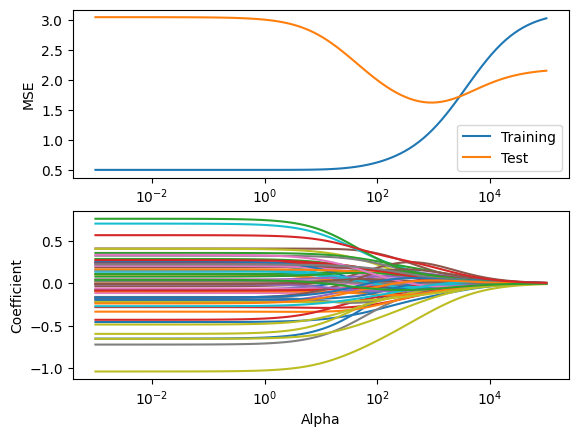

In [ ]:
# Define the range of lambda values
lambdas = np.logspace(-3, 5, 100)

# Initialize lists to store MSEs and coefficients
mse_train = []
mse_test = []
coefficients = []

# For each alpha value...
for lambd in lambdas:
    # Create a Ridge regression model
    model = Ridge(alpha=lambd)

    # Fit the model to the training data
    model.fit(X_train, Y_train)

    # Predict labels for the training and test sets
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)

    # Compute MSE for the training and test sets and append to mse_train and mse_test
    mse_train.append(mean_squared_error(Y_train, Y_train_pred))
    mse_test.append(mean_squared_error(Y_test, Y_test_pred))

    # Append model coefficients to coefficients
    coefficients.append(model.coef_)

# Convert lists to arrays
mse_train = np.array(mse_train)
mse_test = np.array(mse_test)
coefficients = np.array(coefficients)

# Create a new figure
pl.figure()

# Create a subplot for MSE
pl.subplot(2, 1, 1)
pl.plot(lambdas, mse_train, label='Training')
pl.plot(lambdas, mse_test, label='Test')
pl.xscale('log')
pl.xlabel('Alpha')
pl.ylabel('MSE')
pl.legend()

# Create a subplot for coefficients
pl.subplot(2, 1, 2)
for i in range(coefficients.shape[1]):
    pl.plot(lambdas, coefficients[:, i])
pl.xscale('log')
pl.xlabel('Alpha')
pl.ylabel('Coefficient')

# Display the plot
pl.show()

3. *Select the value of $\lambda$ having the best performance on test data and estimate a Ridge model with this $\lambda$ (np.argmin).*

In [ ]:
# Find the index of the minimum MSE on the test set
best_lambda_index = np.argmin(mse_test)

# Get the corresponding alpha value
best_lambda = lambdas[best_lambda_index]

# Create a Ridge regression model with the best alpha
model = Ridge(alpha=best_lambda)

# Fit the model to the training data
model.fit(X_train, Y_train)

print(f'Best lambda: {best_lambda}')
print(f'Associated MSE: {best_lambda_index}')


Best lambda: 954.5484566618347
Associated MSE: 74


4. *Predict the finger flexion of the subject on the training and test sets. Visualize with a scatter plot the true values VS the predictions (pl.scatter).*

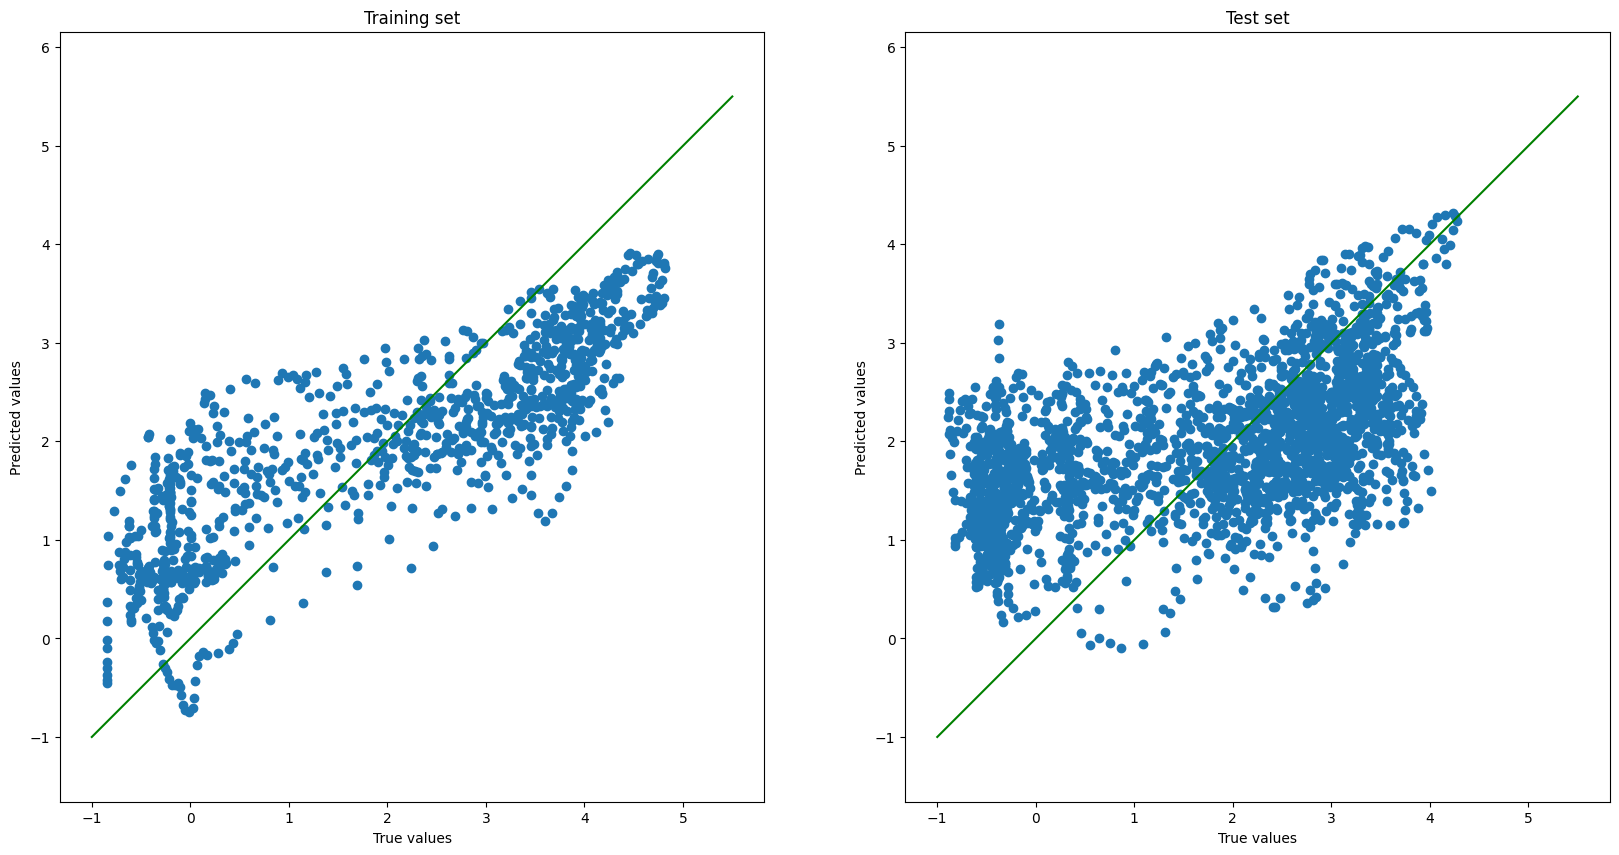

In [ ]:
# Predict finger flexion on the training set
Y_train_pred_ridge_best = model.predict(X_train)

# Predict finger flexion on the test set
Y_test_pred_ridge_best = model.predict(X_test)

import matplotlib.lines as mlines

fig,axes=pl.subplots(1,2,figsize=(20,10))
line = mlines.Line2D([-1, 5.5], [-1, 5.5], color='green',axes=axes[0])

axes[0].scatter(Y_train,Y_train_pred_ridge_best)
axes[0].add_line(line)
axes[0].set_xlabel("True values")
axes[0].set_ylabel("Predicted values")
axes[0].set_title("Training set")
axes[0].axis('equal')

line = mlines.Line2D([-1, 5.5], [-1, 5.5], color='green',axes=axes[1])

#axes[1].add_line(line)
axes[1].scatter(Y_test,Y_test_pred_ridge_best)
axes[1].add_line(line)
axes[1].set_xlabel("True values")
axes[1].set_ylabel("Predicted values")
axes[1].set_title("Test set")
axes[1].axis('equal')

pl.show()

*Comment:* The ridge regressor did not enhance well the LS regressor, because the predictions are not well aligned with the true valueson both datasets.

5. *Plot the predictions along with the true y (pl.plot) as a function of time. Is the prediction good on test data ?*

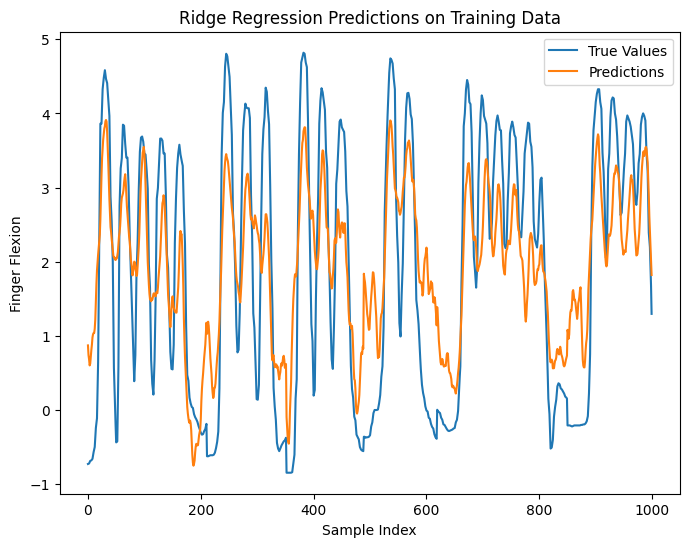

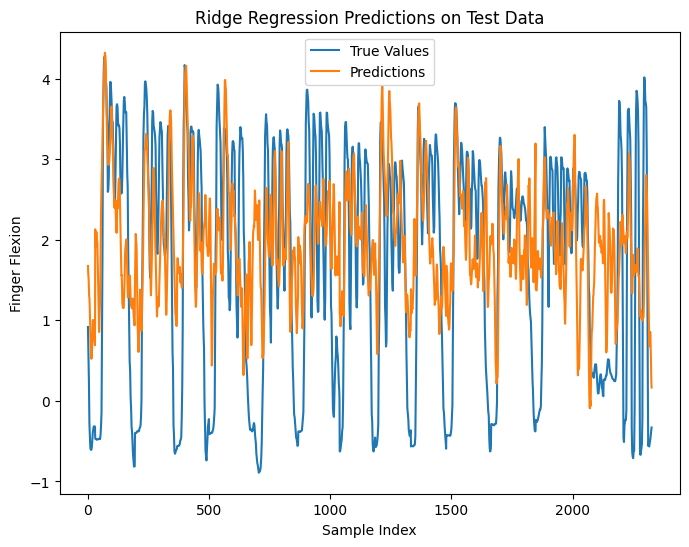

In [ ]:
# Plot predictions vs. true values for training data
pl.figure(figsize=(8, 6))
pl.plot(Y_train, label='True Values')
pl.plot(Y_train_pred_ridge_best, label='Predictions')
pl.xlabel('Sample Index')
pl.ylabel('Finger Flexion')
pl.legend()
pl.title('Ridge Regression Predictions on Training Data')
pl.show()

# Plot predictions vs. true values for test data
pl.figure(figsize=(8, 6))
pl.plot(Y_test, label='True Values')
pl.plot(Y_test_pred_ridge_best, label='Predictions')
pl.xlabel('Sample Index')
pl.ylabel('Finger Flexion')
pl.legend()
pl.title('Ridge Regression Predictions on Test Data')
pl.show()


*Comment:* On the test data, we well capture the variations of the curve, but the prediction seems unaccurate especially for low values. However, the prediction curve is better than the LS one.

Finally, again, the prediction values for the last values are not accurate as previously.

6. *Compute the performance as MSE and $R^2$ on training and test data. Compare with LS estimator and discuss.*

In [ ]:
# Compute MSE and R2 for the training set
mse_train_ridge_best = mean_squared_error(Y_train, Y_train_pred_ridge_best)
r2_train_ridge_best = r2_score(Y_train, Y_train_pred_ridge_best)

# Compute MSE and R2 for the test set
mse_test_ridge_best = mean_squared_error(Y_test, Y_test_pred_ridge_best)
r2_test_ridge_best = r2_score(Y_test, Y_test_pred_ridge_best)


print(f"MSE on Training Data (Ridge best): {mse_train_ridge_best}")
print(f"R2 on Training Data (Ridge best): {r2_train_ridge_best}")
print(f"MSE on Test Data (Ridge best): {mse_test_ridge_best}")
print(f"R2 on Test Data (Ridge best): {r2_test_ridge_best}")

print(f"MSE on Training Data (LS): {mse_train_ls}")
print(f"R2 on Training Data (LS): {r2_train_ls}")
print(f"MSE on Test Data (LS): {mse_test_ls}")
print(f"R2 on Test Data (LS): {r2_test_ls}")


MSE on Training Data (Ridge best): 1.1719430382009632
R2 on Training Data (Ridge best): 0.6268406996047915
MSE on Test Data (Ridge best): 1.6239059826952074
R2 on Test Data (Ridge best): 0.23848766129037868
MSE on Training Data (LS): 0.5040654614476062
R2 on Training Data (LS): 0.8395001217500111
MSE on Test Data (LS): 3.04553687676016
R2 on Test Data (LS): -0.42817006302225114


*Comment:* For the train dataset, the performance metrics are worse in ridge regression compared to the LS regressor (higher for $MSE$ and lower for $R^2$).
But for the test dataset, the $MSE$ is lower for ridge regressor and the $R^2$ is higher than in the LS model.

Finally, we can conclude that with the ridge regularizer, we could reduce the overfitting problem, because we gained better performance on test set.

7. *Interpret the classifiers **w** for both LS and Ridge estimator by plotting their values and their absolute values (pl.stem). Do they show the same important variables (large magnitude) ?*

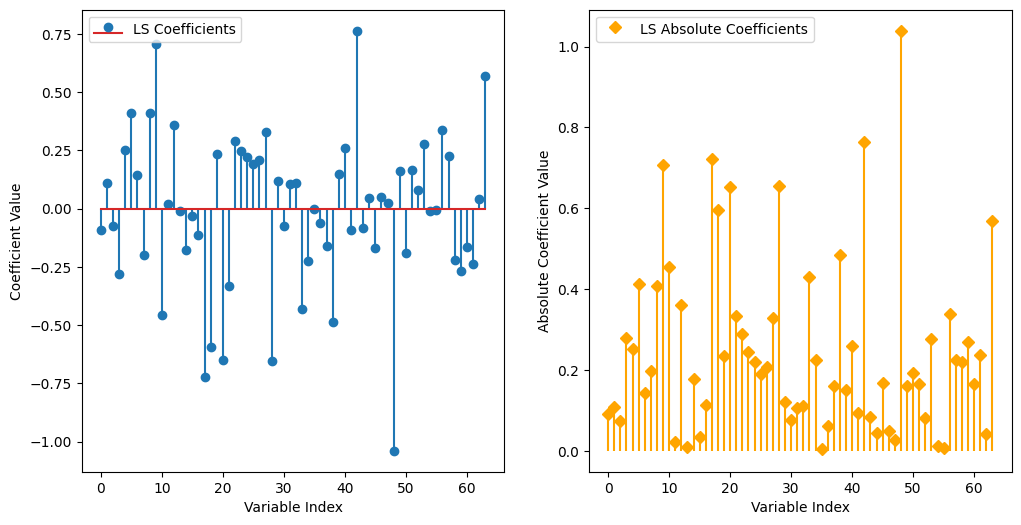

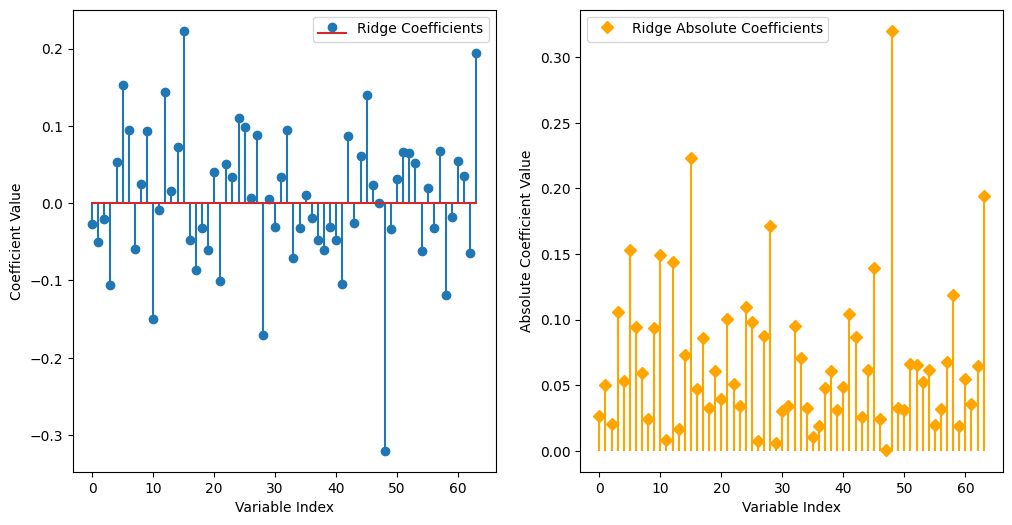

In [ ]:
# Plot coefficients for LS estimator
pl.figure(figsize=(12, 6))
pl.subplot(1, 2, 1)
pl.stem(np.arange(len(w)), w, label='LS Coefficients')
pl.xlabel('Variable Index')
pl.ylabel('Coefficient Value')
pl.legend()

# Plot absolute coefficients for LS estimator
pl.subplot(1, 2, 2)
pl.stem(np.arange(len(w)), np.abs(w), label='LS Absolute Coefficients', linefmt='orange', markerfmt='D', basefmt=' ')
pl.xlabel('Variable Index')
pl.ylabel('Absolute Coefficient Value')
pl.legend()
pl.show()

# Plot coefficients for Ridge estimator with best lambda
pl.figure(figsize=(12, 6))
pl.subplot(1, 2, 1)
pl.stem(np.arange(len(np.ravel(model.coef_))), np.ravel(model.coef_), label='Ridge Coefficients')
pl.xlabel('Variable Index')
pl.ylabel('Coefficient Value')
pl.legend()

# Plot absolute coefficients for Ridge estimator with best alpha
pl.subplot(1, 2, 2)
pl.stem(np.arange(len(np.ravel(model.coef_))), np.abs(np.ravel(model.coef_)), label='Ridge Absolute Coefficients', linefmt='orange', markerfmt='D', basefmt=' ')
pl.xlabel('Variable Index')
pl.ylabel('Absolute Coefficient Value')
pl.legend()
pl.show()


*Comment:* We can see that for the LS regressor many variables have important values of weights.

However, by doing a ridge regularization, many variables had their weights shrunk to zero and others have been reduced.

#Variable selection with the Lasso

1. *Estimate the Lasso predictor on the training data with default value for the regularization parameter (sklearn.linear_model.Lasso).*

In [ ]:
from sklearn.linear_model import Lasso

# Create a Lasso regression model with default alpha (alpha=1.0)
lasso_model = Lasso()

# Fit the model to the training data
lasso_model.fit(X_train, Y_train)

Lasso()

2. *Predict and compute the prediction performances on training and test set, look at the estimated linear model. Notice anything ?*

In [ ]:
# Predict labels for the training and test sets
Y_train_pred_lasso = lasso_model.predict(X_train)
Y_test_pred_lasso = lasso_model.predict(X_test)

# Compute MSE and R2 for the training set
mse_train_lasso = mean_squared_error(Y_train, Y_train_pred_lasso)
r2_train_lasso = r2_score(Y_train, Y_train_pred_lasso)

# Compute MSE and R2 for the test set
mse_test_lasso = mean_squared_error(Y_test, Y_test_pred_lasso)
r2_test_lasso = r2_score(Y_test, Y_test_pred_lasso)

print(f'Training set: MSE = {mse_train_lasso}, R2 = {r2_train_lasso}')
print(f'Test set: MSE = {mse_test_lasso}, R2 = {r2_test_lasso}')

Training set: MSE = 3.1405971577280063, R2 = 0.0
Test set: MSE = 2.190675841640482, R2 = -0.02729265197579034


*Comment:* With default value ($\lambda=1$), the lasso model have a higher error on train data and a lower on test one. Indeed, the lasso model with default parameter seems to reduce the problem of overfitting.

For the correlation values, the scoresclose to zero show that the fitted model does not capture any linear variation between the given data and their predictions.

3. *Estimate the Lasso and, predict the labels and compute the performance for 100 values of the regularization parameter $\lambda$ from $10^{−3}$ to $10^5$. (np.logspace,for i,reg in enumerate(lst_reg):). Plot the evolution of the MSE on training and testing data as a function of $\lambda$.*

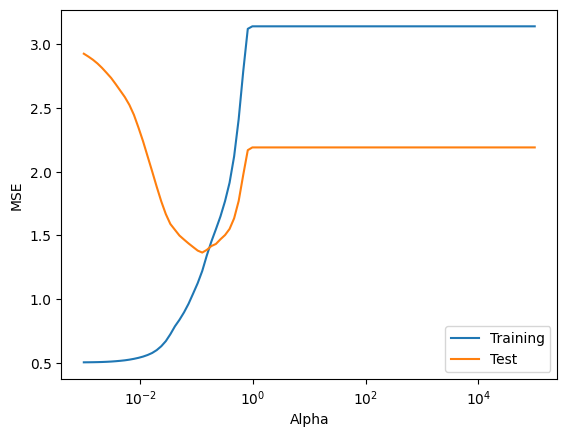

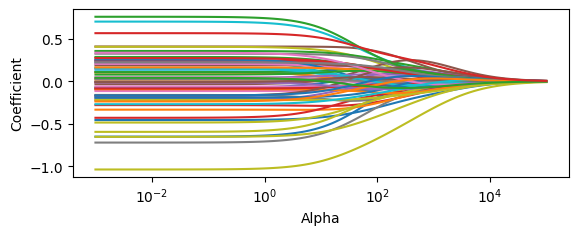

In [ ]:
# Define the range of alpha values
alphas = np.logspace(-3, 5, 100)

# Initialize lists to store MSEs
mse_train = []
mse_test = []

# For each alpha value...
for alpha in alphas:
    # Create a Lasso regression model
    lasso_model = Lasso(alpha=alpha)

    # Fit the model to the training data
    lasso_model.fit(X_train, Y_train)

    # Predict labels for the training and test sets
    Y_train_pred = lasso_model.predict(X_train)
    Y_test_pred = lasso_model.predict(X_test)

    # Compute MSE for the training and test sets and append to mse_train and mse_test
    mse_train.append(mean_squared_error(Y_train, Y_train_pred))
    mse_test.append(mean_squared_error(Y_test, Y_test_pred))

# Convert lists to arrays
mse_train = np.array(mse_train)
mse_test = np.array(mse_test)


# Create a new figure
pl.figure()

# Plot MSE as a function of alpha
pl.plot(alphas, mse_train, label='Training')
pl.plot(alphas, mse_test, label='Test')
pl.xscale('log')
pl.xlabel('Alpha')
pl.ylabel('MSE')
pl.legend()
pl.show()

# Create a subplot for coefficients
pl.subplot(2, 1, 2)
for i in range(coefficients.shape[1]):
    pl.plot(alphas, coefficients[:, i])
pl.xscale('log')
pl.xlabel('Alpha')
pl.ylabel('Coefficient')
pl.show()

4. *Select the value of $\lambda$ having the best performance on test data and estimate a Lasso model with this $\lambda$ (np.argmin).*

In [ ]:
# Find the index of the minimum MSE on the test set
best_alpha_index_lasso = np.argmin(mse_test)

# Get the corresponding alpha value
best_alpha_lasso = alphas[best_alpha_index_lasso]

# Create a Lasso regression model with the best alpha
lasso_model_best_alpha = Lasso(alpha=best_alpha_lasso)

# Fit the model to the training data
lasso_model_best_alpha.fit(X_train, Y_train)


Lasso(alpha=0.1261856883066021)

In [ ]:
# Predict finger flexion on the training set
Y_train_pred_lasso_best_alpha = lasso_model_best_alpha.predict(X_train)

# Predict finger flexion on the test set
Y_test_pred_lasso_best_alpha = lasso_model_best_alpha.predict(X_test)

# Compute MSE and R2 for the training set
mse_train_lasso_best = mean_squared_error(Y_train, Y_train_pred_lasso_best_alpha)
r2_train_lasso_best = r2_score(Y_train, Y_train_pred_lasso_best_alpha)

# Compute MSE and R2 for the test set
mse_test_lasso_best = mean_squared_error(Y_test, Y_test_pred_lasso_best_alpha)
r2_test_lasso_best = r2_score(Y_test, Y_test_pred_lasso_best_alpha)


print(f"MSE on Training Data (Lasso best): {mse_train_lasso_best}")
print(f"R2 on Training Data (Lasso best): {r2_train_lasso_best}")
print(f"MSE on Test Data (Lasso best): {mse_test_lasso_best}")
print(f"R2 on Test Data (Lasso best): {r2_test_lasso_best}")

MSE on Training Data (Lasso best): 1.2215631527944377
R2 on Training Data (Lasso best): 0.6110411200657935
MSE on Test Data (Lasso best): 1.3659542352560023
R2 on Test Data (Lasso best): 0.359451214944292


5. *Predict the finger flexion of the subject on the training and test sets. Plot the predictions along with the true y (pl.plot) as a function of time.*

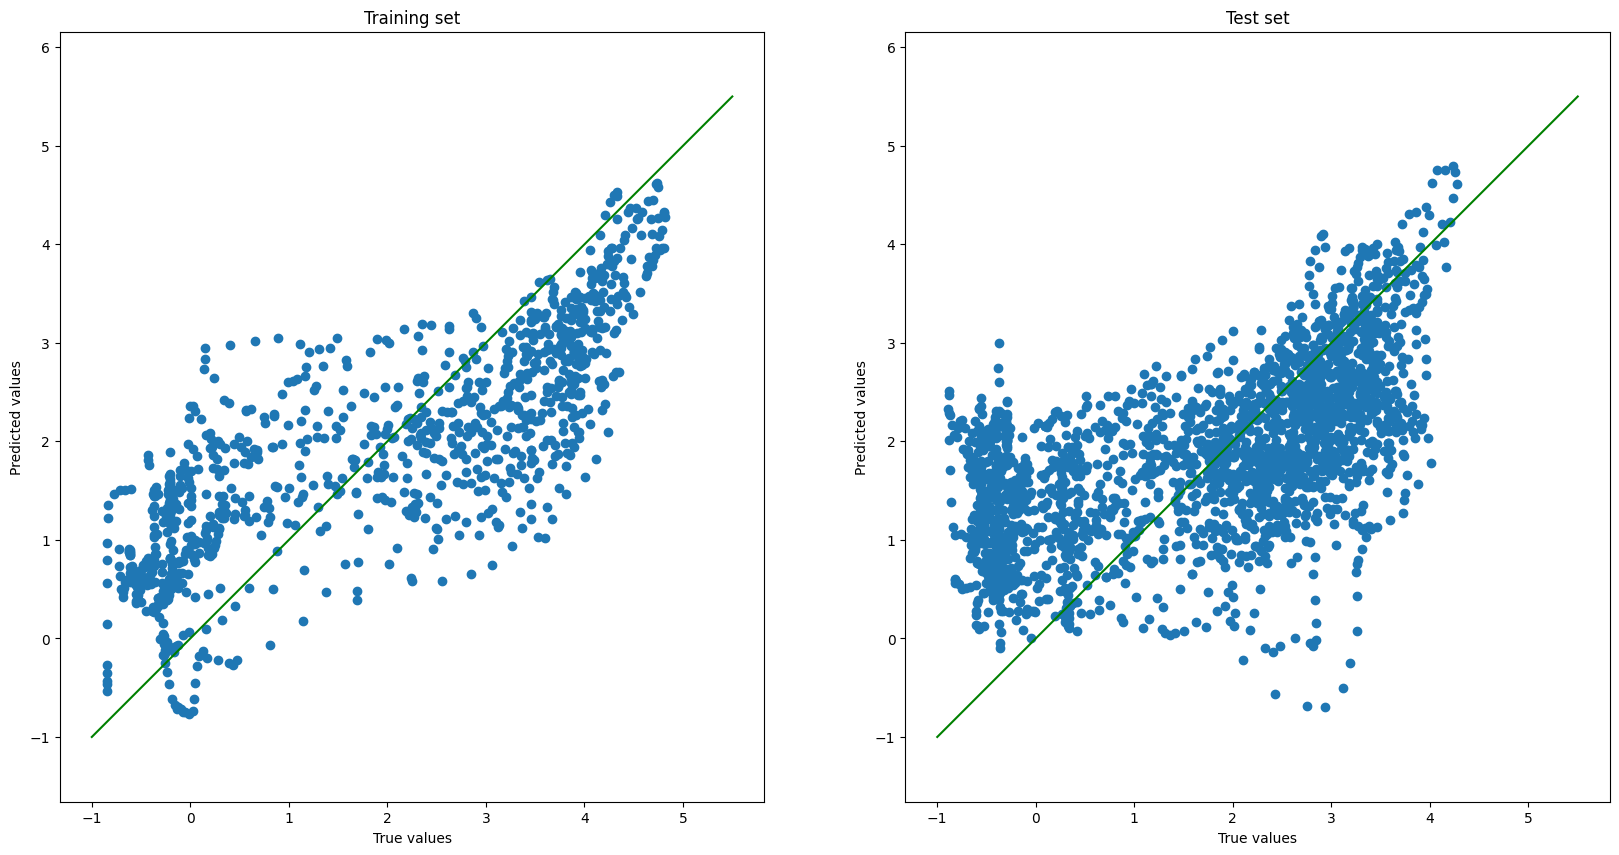

In [ ]:
# Predict finger flexion on the training set
Y_train_pred_lasso_best_alpha = lasso_model_best_alpha.predict(X_train)

# Predict finger flexion on the test set
Y_test_pred_lasso_best_alpha = lasso_model_best_alpha.predict(X_test)

import matplotlib.lines as mlines

fig,axes=pl.subplots(1,2,figsize=(20,10))
line = mlines.Line2D([-1, 5.5], [-1, 5.5], color='green',axes=axes[0])

axes[0].scatter(Y_train,Y_train_pred_lasso_best_alpha)
axes[0].add_line(line)
axes[0].set_xlabel("True values")
axes[0].set_ylabel("Predicted values")
axes[0].set_title("Training set")
axes[0].axis('equal')

line = mlines.Line2D([-1, 5.5], [-1, 5.5], color='green',axes=axes[1])

#axes[1].add_line(line)
axes[1].scatter(Y_test,Y_test_pred_lasso_best_alpha)
axes[1].add_line(line)
axes[1].set_xlabel("True values")
axes[1].set_ylabel("Predicted values")
axes[1].set_title("Test set")
axes[1].axis('equal')

pl.show()

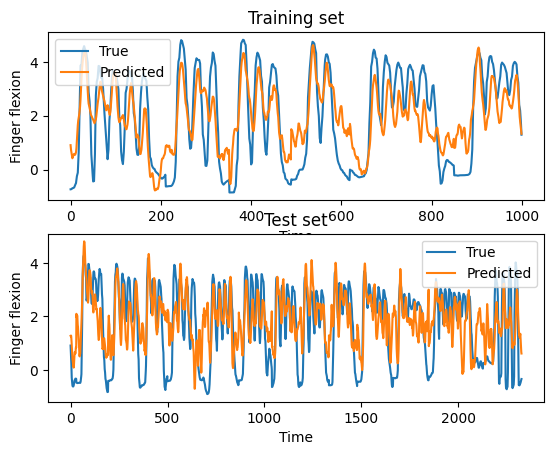

In [ ]:

pl.figure()

# Plot true and predicted values for the training set
pl.subplot(2, 1, 1)
pl.plot(Y_train, label='True')
pl.plot(Y_train_pred_lasso_best_alpha, label='Predicted')
pl.xlabel('Time')
pl.ylabel('Finger flexion')
pl.title('Training set')
pl.legend()

# Plot true and predicted values for the test set
pl.subplot(2, 1, 2)
pl.plot(Y_test, label='True')
pl.plot(Y_test_pred_lasso_best_alpha, label='Predicted')
pl.xlabel('Time')
pl.ylabel('Finger flexion')
pl.title('Test set')
pl.legend()

# Display the plot
pl.show()

*Comment:* Using the lasso regularizer, we can observe a good approximation on the test curve, by reaching the low values and following its variation. And also, contrary to the precedent models, the end of the prediction is better.

6. *Interpret the classifiers **w** for the Lasso estimator by plotting their values and their absolute values (pl.stem). What are the two most important variables ?*

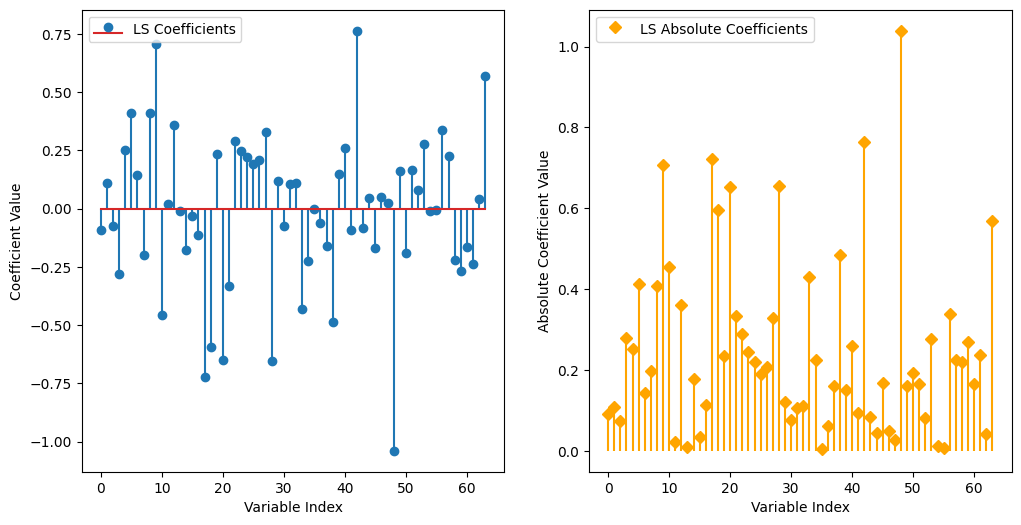

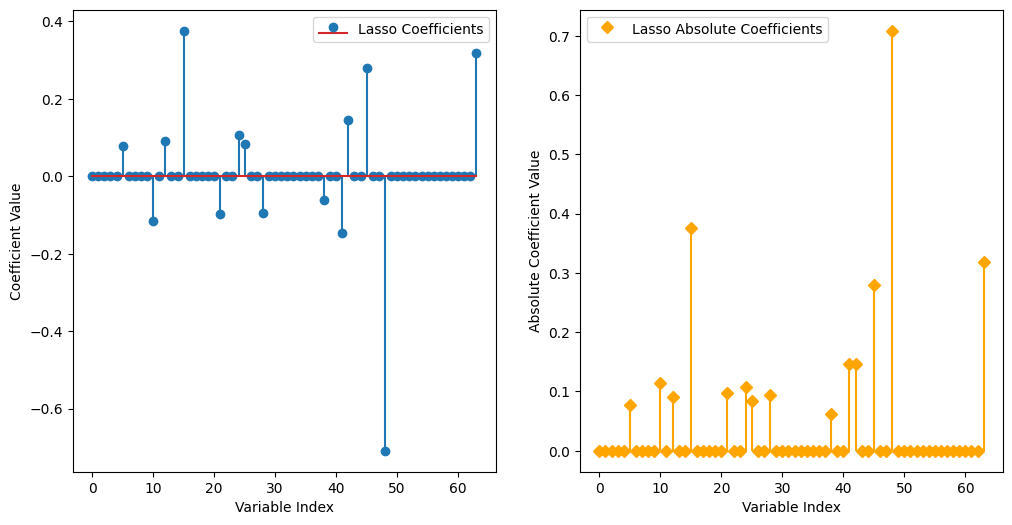

In [ ]:
# Plot coefficients for LS estimator
pl.figure(figsize=(12, 6))
pl.subplot(1, 2, 1)
pl.stem(np.arange(len(w)), w, label='LS Coefficients')
pl.xlabel('Variable Index')
pl.ylabel('Coefficient Value')
pl.legend()

# Plot absolute coefficients for LS estimator
pl.subplot(1, 2, 2)
pl.stem(np.arange(len(w)), np.abs(w), label='LS Absolute Coefficients', linefmt='orange', markerfmt='D', basefmt=' ')
pl.xlabel('Variable Index')
pl.ylabel('Absolute Coefficient Value')
pl.legend()
pl.show()

# Plot coefficients for Ridge estimator with best lambda
pl.figure(figsize=(12, 6))
pl.subplot(1, 2, 1)
pl.stem(np.arange(len(np.ravel(lasso_model_best_alpha.coef_))), np.ravel(lasso_model_best_alpha.coef_), label='Lasso Coefficients')
pl.xlabel('Variable Index')
pl.ylabel('Coefficient Value')
pl.legend()

# Plot absolute coefficients for Ridge estimator with best alpha
pl.subplot(1, 2, 2)
pl.stem(np.arange(len(np.ravel(lasso_model_best_alpha.coef_))), np.abs(np.ravel(lasso_model_best_alpha.coef_)), label='Lasso Absolute Coefficients', linefmt='orange', markerfmt='D', basefmt=' ')
pl.xlabel('Variable Index')
pl.ylabel('Absolute Coefficient Value')
pl.legend()
pl.show()

In [ ]:
# Get the indices of the two largest absolute coefficients
important_vars = np.argsort(np.abs(lasso_model_best_alpha.coef_))[-2:]

print(f'The two most important variables are {important_vars[0]} and {important_vars[1]}')

The two most important variables are 15 and 48


*Comment:* We see that the lasso regularizer also vanishes (weights reduce to zero) some variables. The variables $15$ and $48$ are significantly non-zero weights.

7. *How many features were selected by the lasso. What would the reduction of the number of electrodes ?*

In [ ]:
# Count the number of non-zero coefficients
num_selected_features = np.count_nonzero(lasso_model_best_alpha.coef_)

print(f'The Lasso selected {num_selected_features} features.')

The Lasso selected 14 features.


*Comment:* The Lasso model with best alpha selected 14 coefficients, which have therefore nonnull coefficients.

The reduction of the number of electrodes are not important. The diminished significance of certain electrodes in the prediction task can be understood by considering that finger movement activates a specific region in the brain. Only the electrodes positioned over this active region contribute to the prediction, rendering the others superfluous. This task demonstrates that accurate results can be achieved with a limited number of electrodes. Therefore, it is more efficient to measure activity from a select few electrodes rather than enveloping the subject's brain with numerous ones.

#Nonlinear regression

*For the non-linear regressors, sklearn.ensemble.RandomForestRegressor, sklearn.svm.SVR, sklearn.
neural_network.MLPClassifier do the following:*

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

1. *Fit the model with the default parameters and compute its prediction performance. Is it better than LS (that has no parameters), Ridge or Lasso estimators ?*

**Random Forest Regression**

In [ ]:
# Fit the model with default parameters
random_forest_model = RandomForestRegressor(random_state=123)
random_forest_model.fit(X_train, Y_train)

# Predictions on training data
Y_train_pred_rf = random_forest_model.predict(X_train)

# Predictions on test data
Y_test_pred_rf = random_forest_model.predict(X_test)

# Compute MSE and R2 for RandomForestRegressor on training data
mse_train_rf = mean_squared_error(Y_train, Y_train_pred_rf)
r2_train_rf = r2_score(Y_train, Y_train_pred_rf)

# Compute MSE and R2 for RandomForestRegressor on test data
mse_test_rf = mean_squared_error(Y_test, Y_test_pred_rf)
r2_test_rf = r2_score(Y_test, Y_test_pred_rf)

print(f"MSE on Training Data (Random Forest): {mse_train_rf}")
print(f"R2 on Training Data (Random Forest): {r2_train_rf}")
print(f"MSE on Test Data (Random Forest): {mse_test_rf}")
print(f"R2 on Test Data (Random Forest): {r2_test_rf}")

<ipython-input-30-c53474d3b5dd>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_model.fit(X_train, Y_train)


MSE on Training Data (Random Forest): 0.023062227372629633
R2 on Training Data (Random Forest): 0.9926567381251425
MSE on Test Data (Random Forest): 1.6621166563200045
R2 on Test Data (Random Forest): 0.22056919818613208


*Comment:* The model has also a problem of overfitting to the train dataset. However, it is better than the LS model, but it does achieve grater performance then the Lasso and the Ridge ones.

**Support Vector Regression**

In [ ]:
# Fit the model with default parameters
svr_model = SVR()
svr_model.fit(X_train, Y_train)

# Predictions on training data
Y_train_pred_svr = svr_model.predict(X_train)

# Predictions on test data
Y_test_pred_svr = svr_model.predict(X_test)

# Compute MSE and R2 for SVR on training data
mse_train_svr = mean_squared_error(Y_train, Y_train_pred_svr)
r2_train_svr = r2_score(Y_train, Y_train_pred_svr)

# Compute MSE and R2 for SVR on test data
mse_test_svr = mean_squared_error(Y_test, Y_test_pred_svr)
r2_test_svr = r2_score(Y_test, Y_test_pred_svr)

print(f"MSE on Training Data (SVR): {mse_train_svr}")
print(f"R2 on Training Data (SVR): {r2_train_svr}")
print(f"MSE on Test Data (SVR): {mse_test_svr}")
print(f"R2 on Test Data (SVR): {r2_test_svr}")

MSE on Training Data (SVR): 0.024085982516610357
R2 on Training Data (SVR): 0.9923307634481734
MSE on Test Data (SVR): 1.515182870123942
R2 on Test Data (SVR): 0.28947213490412815


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


*Comment:* This model has also the problem of overfitting to the train dataset (a value close to 1 of $R^2$ and very low $MSE$). This one has better performance than the LS and the ridge models.

**MLP Regression**

In [ ]:
# Fit the model with default parameters
mlp_model = MLPRegressor(random_state=42)
mlp_model.fit(X_train, Y_train)

# Predictions on training data
Y_train_pred_mlp = mlp_model.predict(X_train)

# Predictions on test data
Y_test_pred_mlp = mlp_model.predict(X_test)

# Compute MSE and R2 for MLP on training data
mse_train_mlp = mean_squared_error(Y_train, Y_train_pred_mlp)
r2_train_mlp = r2_score(Y_train, Y_train_pred_mlp)

# Compute MSE and R2 for MLP on test data
mse_test_mlp = mean_squared_error(Y_test, Y_test_pred_mlp)
r2_test_mlp = r2_score(Y_test, Y_test_pred_mlp)

print(f"MSE on Training Data (MLP): {mse_train_mlp}")
print(f"R2 on Training Data (MLP): {r2_train_mlp}")
print(f"MSE on Test Data (MLP): {mse_test_mlp}")
print(f"R2 on Test Data (MLP): {r2_test_mlp}")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE on Training Data (MLP): 0.009230062400608629
R2 on Training Data (MLP): 0.9970610486041177
MSE on Test Data (MLP): 2.5373547961930027
R2 on Test Data (MLP): -0.18986382560034554


*Comment:* The model has also a problem of overfitting to the train dataset. However, it is better than the LS model, but it does achieve grater performance then the Lasso and the Ridge ones.

2. *Validate (by hand, or with a loop) some of the important parameters in order to maximize the performance on test. Is the performance very dependent on the parameters ?*

**Random Forest Regression**

In [ ]:
# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Create the grid search model
grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, Y_train)

# Get the best parameters from the grid search
best_rf = grid_search.best_params_

# Fit the model with the best parameters
rf_model_best = RandomForestRegressor(**best_rf, random_state=123)
rf_model_best.fit(X_train, Y_train)

# Predictions on test data with the best parameters
Y_test_pred_rf_best = rf_model_best.predict(X_test)

# Compute MSE and R2 for RandomForestRegressor on test data with best parameters
mse_test_rf_best = mean_squared_error(Y_test, Y_test_pred_rf_best)
r2_test_rf_best = r2_score(Y_test, Y_test_pred_rf_best)



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

In [ ]:
print(f"Best Parameters for RandomForestRegressor: {best_rf}")
print(f"MSE on Test Data (Random Forest, Best Params): {mse_test_rf_best}")
print(f"R2 on Test Data (Random Forest, Best Params): {r2_test_rf_best}")

Best Parameters for RandomForestRegressor: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 150}
MSE on Test Data (Random Forest, Best Params): 1.6558438200692365
R2 on Test Data (Random Forest, Best Params): 0.2235107737789116


*Comment:* We observe a reduction of the $MSE$ and an augmentation of the $R^2$ score, which shows that the model performance is relatively dependent on the parameters choice.

Finally, the optimal RF model is better than the LS and the Ridge models since its performance metrics are better (lower $MSE$ and higher $R^2$). However, the  variable selection with Lasso is still better than the random forest model.

**Support Vector Regression**

In [ ]:
# Define the parameter grid for grid search
param_grid_svr = {
    'C': [1, 10, 100],
    'epsilon': [0.1, 0.2, 0.5],
    'kernel': ['linear', 'rbf', 'poly']
}

# Create the grid search model
grid_search_svr = GridSearchCV(estimator=svr_model, param_grid=param_grid_svr, cv=5, scoring='neg_mean_squared_error')
grid_search_svr.fit(X_train, Y_train)

# Get the best parameters from the grid search
best_svr = grid_search_svr.best_params_

# Fit the model with the best parameters
svr_model_best = SVR(**best_svr)
svr_model_best.fit(X_train, Y_train)

# Predictions on test data with the best parameters
Y_test_pred_svr_best = svr_model_best.predict(X_test)

# Compute MSE and R2 for SVR on test data with best parameters
mse_test_svr_best = mean_squared_error(Y_test, Y_test_pred_svr_best)
r2_test_svr_best = r2_score(Y_test, Y_test_pred_svr_best)



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [ ]:
print(f"Best Parameters for SVR: {best_svr}")
print(f"MSE on Test Data (SVR Best): {mse_test_svr_best}")
print(f"R2 on Test Data (SVR Best): {r2_test_svr_best}")

Best Parameters for SVR: {'C': 10, 'epsilon': 0.1, 'kernel': 'rbf'}
MSE on Test Data (SVR Best): 1.5532318696419931
R2 on Test Data (SVR Best): 0.2716294870431586


*Comment:* We observe that the performance metrics did not change a lot on test dataset by tuning the parameters of the initial SVR model. So, the performance of SVR model on the test data is not really dependent on tuning the parameters of the model.

**MLP Regression**

In [ ]:
# Define the parameter grid for grid search
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01]
}

# Create the grid search model
grid_search_mlp = GridSearchCV(estimator=mlp_model, param_grid=param_grid_mlp, cv=5, scoring='neg_mean_squared_error')
grid_search_mlp.fit(X_train, Y_train)

# Get the best parameters from the grid search
best_mlp = grid_search_mlp.best_params_

# Fit the model with the best parameters
mlp_model_best = MLPRegressor(random_state=42, **best_mlp)
mlp_model_best.fit(X_train, Y_train)

# Predictions on test data with the best parameters
Y_test_pred_mlp_best = mlp_model_best.predict(X_test)

# Compute MSE and R2 for MLP on test data with best parameters
mse_test_mlp_best = mean_squared_error(Y_test, Y_test_pred_mlp_best)
r2_test_mlp_best = r2_score(Y_test, Y_test_pred_mlp_best)



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed w

In [ ]:
print(f"Best Parameters for MLP: {best_mlp}")
print(f"MSE on Test Data (MLP Best): {mse_test_mlp_best}")
print(f"R2 on Test Data (MLP Best): {r2_test_mlp_best}")

Best Parameters for MLP: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (100, 50)}
MSE on Test Data (MLP Best): 2.2553307936056317
R2 on Test Data (MLP Best): -0.05761186023341547


*Comment:* We achieve better results on test dataset, by tuning the parameters of the MLP regressor. Indeed, the changes in performance metrics are the most important of the three methods with a lower $MSE$ and a higher $R^2$.

Hence, this means that we controlled the problem of overfitting previously mentioned. Thus the MLP model performance is very dependent on the model parameters.

3. *Plot the predictions along with the true y (pl.plot) as a function of time. Is the regression method good and why ?*

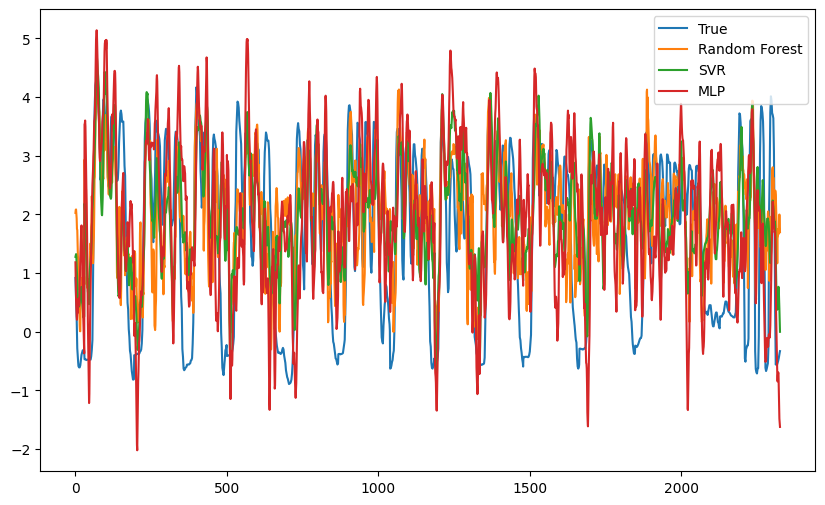

In [ ]:
pl.figure(figsize=(10, 6))
pl.plot(Y_test, label='True')
pl.plot(Y_test_pred_rf_best, label='Random Forest')
pl.plot(Y_test_pred_svr_best, label='SVR')
pl.plot(Y_test_pred_mlp_best, label='MLP')
pl.legend()
pl.show()

**Random Forest Regression**

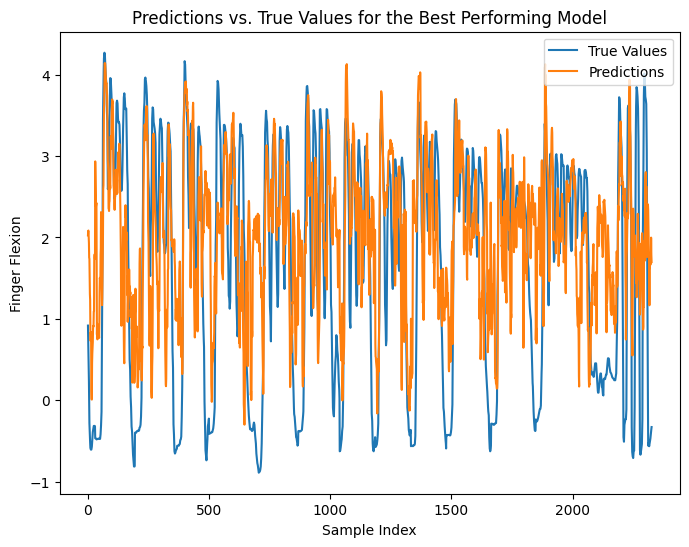

In [ ]:
best_model = rf_model_best

# Make predictions on the test data
y_test_pred_best_model = best_model.predict(X_test)

# Create a new figure
pl.figure(figsize=(8, 6))
pl.plot(Y_test, label='True Values')
pl.plot(y_test_pred_best_model, label='Predictions')
pl.xlabel('Sample Index')
pl.ylabel('Finger Flexion')
pl.legend()
pl.title('Predictions vs. True Values for the Best Performing Model')
pl.show()


*Comment:* As previously discussed, the prediction on test dataset is better than LS and Ridge, but it is still worse than Lasso.

At the end, we observe a notable difference between true values and predicted ones. Indeed, the random forest regressor assigns the average values of the split zones, therefore the prediction is not always good on test dataset.

**Support Vector Regression**

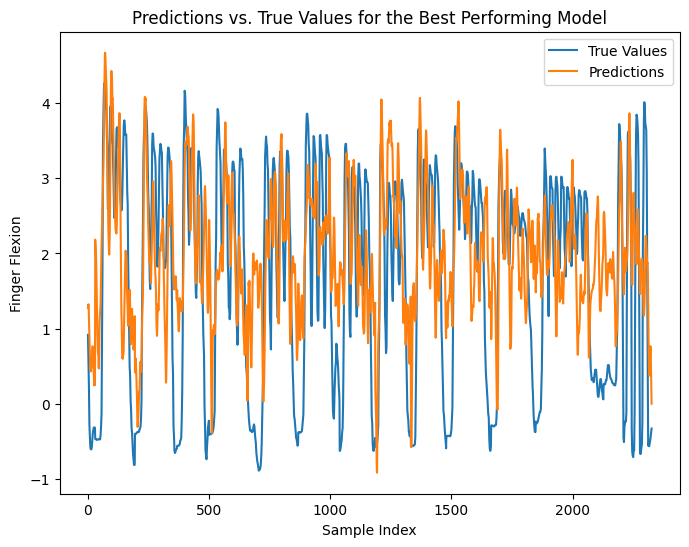

In [ ]:
best_model = svr_model_best

# Make predictions on the test data
y_test_pred_best_model = best_model.predict(X_test)

# Create a new figure
pl.figure(figsize=(8, 6))
pl.plot(Y_test, label='True Values')
pl.plot(y_test_pred_best_model, label='Predictions')
pl.xlabel('Sample Index')
pl.ylabel('Finger Flexion')
pl.legend()
pl.title('Predictions vs. True Values for the Best Performing Model')
pl.show()


*Comment:* We can observe a quite accurate prediction of the SVR model. Indeed, it reaches well low values, but still at the end, the prediction is not good.

**MLP Regression**

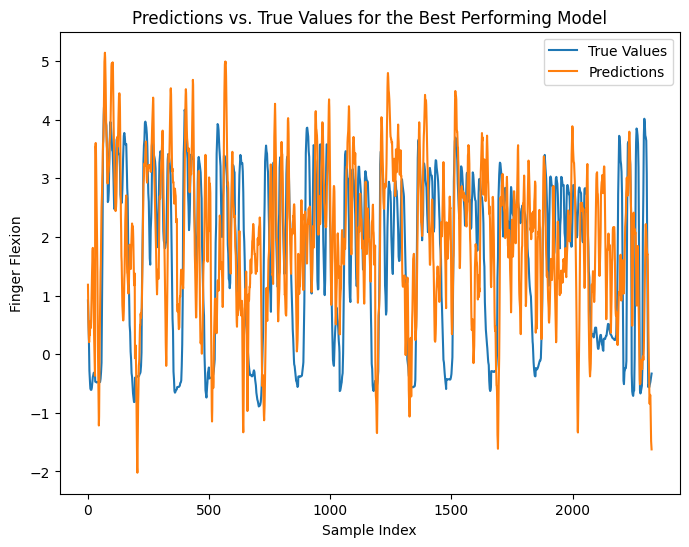

In [ ]:
best_model = mlp_model_best

# Make predictions on the test data
y_test_pred_best_model = best_model.predict(X_test)

# Create a new figure
pl.figure(figsize=(8, 6))
pl.plot(Y_test, label='True Values')
pl.plot(y_test_pred_best_model, label='Predictions')
pl.xlabel('Sample Index')
pl.ylabel('Finger Flexion')
pl.legend()
pl.title('Predictions vs. True Values for the Best Performing Model')
pl.show()


*Comment:* Similarly to the SVR model, the MLP one has a quite acceptable prediction as simulating the test curve. However, the MLP model cannot reach the low values and the end of the prediction is quite bad.

#Final comparison of the performances

1. *Collect the test performances for all methods investigated above in a table (in a dataframe and printing it for instance). Which methods work the best in practice ?*

In [ ]:
import pandas as pd

# Create a DataFrame to store test performances for all methods
data = {
    'Method': ['Least Squares', 'Ridge Regression', 'Lasso', 'Random Forest', 'SVR', 'MLP'],
    'MSE on Test Data': [mse_test_ls, mse_test_ridge_best, mse_test_lasso_best, mse_test_rf_best, mse_test_svr_best, mse_test_mlp_best],
    'R2 on Test Data': [r2_test_ls, r2_test_ridge_best, r2_test_lasso_best, r2_test_rf_best, r2_test_svr_best, r2_test_mlp_best]
}

performance_df = pd.DataFrame(data)
print(performance_df)


             Method  MSE on Test Data  R2 on Test Data
0     Least Squares          3.045537        -0.428170
1  Ridge Regression          1.623906         0.238488
2             Lasso          1.365954         0.359451
3     Random Forest          1.655844         0.223511
4               SVR          1.553232         0.271629
5               MLP          2.255331        -0.057612


*Comment:* Therefore we can order the models by their performance metrics on the test data:

1. Lasso
2. SVR
3. Ridge
4. Random Forest
5. MLP
6. Least Squares

2. *What are the most interpretable models ?*

The linear models (Least Squares, Ridge Regression, and Lasso) are more interpretable as they provide coefficients for each input feature.

Then the bagging models (RF) are less interpretable and the nonlinear models (MLP and SVR) are also less interpretable.

3. *Which model is best from a medical/practical perspective ?*

The best model from a medical/practical perspective depends on the specific requirements of the application. If interpretability is crucial, Least Squares, Ridge Regression, or Lasso might be preferred. If predictive accuracy is the primary concern, Random Forest, SVR, or MLP could be the better choices.

Hence, combining both objectives, the best model is linear regression with lasso regularizer. The use of Lasso regularizer leaves only the most pertinent and correlated variables, since working in high dimensionality.



4. *Do we need non-linearity in this application ?*

The need for non-linearity in this application depends on the complexity of the relationship between input features and the target variable. If the relationship is linear, linear models like Least Squares, Ridge Regression, or Lasso might suffice. But, if the relationship is complex and nonlinear, models like Random Forest, SVR, or MLP could provide better predictions.

However, in this application, we do not need nonlinearity, since we can achieve satisfying results with the lasso regularizer on linear regression. To conclude, the use of nonlinear models is not always pertinent, when we have good results with linear models.

5. *Is validation on the test data a good practice? What would you do if you need to provide a model to a client for prediction in production ?*

Validation on the test data is essential to assess the model's performance on unseen data.  However, validation on test data is not good in practice; indeed, the test data should not be used in the model choice.

Therefore, it is crucial to have a separate validation set that the model has never seen before, which can be a subset from the train dataset.

Moreover, cross-validation over the training dataset can help in selecting the best model and tuning hyperparameters.



If providing a model, we should train the final model on a large portion of the available data and keep a separate holdout dataset for periodic validation. Additionally, monitoring the model's performance over time and retraining it when necessary is essential for maintaining accuracy in a real-world setting.

#Personal Discussion

I felt more comfortable with the regression methods, compared to the previous practical session. However, working with machine learning models and processing real-world data posed challenges, especially in understanding the nuances of different algorithms and their hyperparameters.

Moreover, the fact that we discovered a real-world application this time was quite stimulating. Understanding the limitations and assumptions of different algorithms is vital in selecting the most suitable approach for specific problems. Moving forward, a focus on continuous learning and practice is essential. Exploring more complex datasets and diverse problem domains will provide a broader perspective.